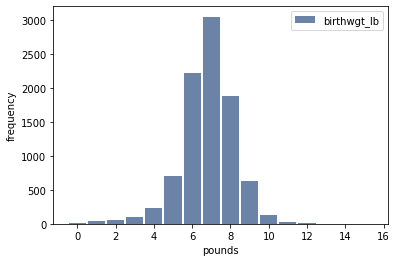

Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.0180273009157768
Others 1.9437810258964572
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) -1.7171423678372415
Cohen d -0.088672927072602
Mode of preg length 39
39 4693
40 1116
38 607
41 587
37 455


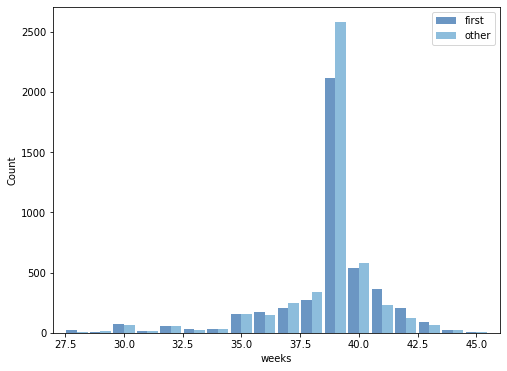

In [21]:
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com
Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

import sys
from operator import itemgetter
import nsfg
import thinkplot
import first
import thinkstats2

#Working through code snippets from the reading in Chapter 2. This will help me answer 2-1.
#Creates histogram for birthweight in pounds
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

#Creates histogram of pregnancy counts in weeks for both first born and then the 'everything else'
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

#Finding mean and standard deviation
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
mean, std

#2-1 Summarize what was learned regarding whether first born babies arrive late
#From what I've found looking through the data in this chapter and then providing some visual examples that Downey walks us through, the average length of pregnancy is 39 weeks, which is considered on time. Even took this a step further and provided a visualization of average length of pregnancy for both first born and all the others, and again the largest numbers were considered on time, with only a small tail to the right indicating late births. 
#If I wanted to get a stosry on the evening news I would most likely use the summary statistics of modes and spread. Modes would be able to show if there are more than one cluster point, which makes a good news story and could address believers on both sides of the argument. Spread is going to show the variability, which again could be good for both sides of the argument. For a stressed out mother I woudl most likely show her central tendency and tails. The central tendancy is going to show her the largest cluster of numbers, which in this case shows babies being born on time. Tails will show that there is not a large tail to the right indicating late births.
#Today I want to answer "Do first babies arrive late." One of the first steps taken to find out whether first babies arrive late is to put it into a visualization. The second graph shows us a large peak for both first and other preganancies right between the 37-41 weeks mark. This means the majority of our pregnancy lengths are on time. The mean pregnancy length is 38.6 weeks with a standard deviation of about 2.7. This means there could be up to a 3 week difference that wouldn't be out of the ordinary. Something that does need to be taken into consideration is this is only a sampling of data, so these numbers only indicate answers fors this population. However, based on the data at hand I can confidentlly say that first born babies on average are not late. 

#2-4 Using variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 
#Created function for Mode
def Mode(hist):
    p, x = max([(p, x) for x, p in hist.Items()])
    return x

#Created function for All Modes
def AllModes(hist):
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)

def WeightDifference(live, firsts, others):
    #Setting variable for mean for live births, first births, and all other births
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()
    #Setting variable for variance for first birth weight and other birth weight
    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()
    #Printing the means
    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)
    #Printing the variance
    print('Variance')
    print('First babies', var1)
    print('Others', var2)
    #Printing the difference in mean for both pounds and ounces
    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)
    #Cohen's d - this quantifies the difference between the groups
    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)


def main():
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # explore the weight difference between firstborn babies and others
    WeightDifference(live, firsts, others)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert(mode == 39)

    # test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)

    for value, freq in modes[:5]:
        print(value, freq)

if __name__ == '__main__':
    main()


